In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import BallTree
%matplotlib inline

In [2]:
drinks = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/Git/part2/session_5-master/data/drinks.csv')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
def bvs(x):
    if x == 'AS':
        return 1
    elif x == 'EU':
        return 0

In [5]:
drinks['ASvEU'] = drinks['continent'].apply(bvs)
drinks = drinks.dropna()

In [6]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,ASvEU
0,Afghanistan,0,0,0,0.0,AS,1.0
1,Albania,89,132,54,4.9,EU,0.0
3,Andorra,245,138,312,12.4,EU,0.0
7,Armenia,21,179,11,3.8,EU,0.0
9,Austria,279,75,191,9.7,EU,0.0
...,...,...,...,...,...,...,...
181,United Arab Emirates,16,135,5,2.8,AS,1.0
182,United Kingdom,219,126,195,10.4,EU,0.0
186,Uzbekistan,25,101,8,2.4,AS,1.0
189,Vietnam,111,2,1,2.0,AS,1.0


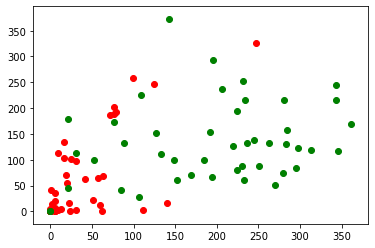

In [7]:
plt.scatter(
    drinks[drinks['ASvEU'] == 1.0].beer_servings,
    drinks[drinks['ASvEU'] == 1.0].spirit_servings,
    color='red'
)
plt.scatter(
    drinks[drinks['ASvEU'] == 0.0].beer_servings,
    drinks[drinks['ASvEU'] == 0.0].spirit_servings,
    color='green'
)
plt.show()

In [8]:
nbors = KNeighborsClassifier(n_neighbors=5)
x = drinks[['beer_servings', 'spirit_servings']]
y = drinks['ASvEU']
nbors.fit(x,y)

print(nbors.predict([[75, 200]]))
print(nbors.predict_proba([[75, 200]]))

[1.]
[[0.2 0.8]]
